Quantitative Research Approaches  
Lecture 2

# Survey data, sampling and confidence intervals

Prof Miles Berry  
6/2/24

## Stages of an investigation using quantitative methods

* Pose a research question that
motivates the research/form a
hypothesis
* Collect relevant data
  * Choose a sample
  * Design a questionnaire  
  * Conduct an experiment
* Analyse the data
   * Calculate descriptive statistics
   * Create visualisations
   * Check for normality
* Interpret the results
   * Test for relationships
   * Test for causality
   * Confirm or reject the hypothesis

## From population to data

* Population: the entire group of individuals or instances about whom we want to draw conclusions
* Study population: the group of individuals or instances from which we can actually collect data
* Sample: a subset of the study population from which we actually collect data
* Data: the information we collect from the sample

## Sampling

> The quality of a piece of research not only stands or falls by the appropriateness of methodology … by also by the suitability of the sampling strategy that has been adopted. Questions of sampling arise directly out of the issue of defining the population on which the research will focus. (Cohen et al, 2011, p. 180)

* Sample size
* Representativeness of the sample
* Access to the sample
* Sampling strategy
* Methods




## Sampling strategies

* **Random**
* Systematic
* **Stratified**
* Convenience
* Quota
* Volunteer
* Snowball

### Convenience sampling

> Convenience sampling - or, as it is sometimes called, accidental or opportunity sampling - involves choosing the nearest individuals to serve as respondents and continuing that process until the required sample size has been obtained or those who happen to be available and accessible at the time. Captive audiences such as students or student teachers often serve as respondents based on convenience sampling. The researcher simply chooses the sample from those to whom she has easy access. As it does not represent any group apart from itself, it does not seek to generalize about the wider population; for a convenience sample that is an irrelev-ance. The researcher, of course, must take pains to report this point - that the parameters of generalizability in this type of sample are negligible. A convenience sample may be the sampling strategy selected for a case study or a series of case studies. (Cohen et al, 2011, p. 155-6)

## Sampling after surveying

*Don't try this at home*

So I've got 1918 responses from primary ITT students to a survey about their confidence in a range of digital skills from 2013-2019. Let's import this data to Pandas and then imagine doing this as a random sample of 30 responses from the same study population.

The questions are [here](https://docs.google.com/forms/d/e/1FAIpQLSfgILZUbgAy76Y6xNxJo6qKb11yks45JM1cxtlOEHL_pQzyfw/formResponse), but we'll look at these later. The spreadsheet is on Moodle if you want to use Excel to look at what we have. 

In [59]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use("ggplot")
%matplotlib inline
plt.rcParams['figure.dpi'] = 120


In [73]:
audit0 = pd.read_excel('data/anonymisedComputingAudit.xlsx')

audit = audit0

audit.describe().transpose()


,count,unique,top,freq
Timestamp,1918,1857,2014/09/08 5:23:33 pm CET,3
U/P,1918,2,P,984
Using a computer,1908,5,Competent,752
Managing documents,1914,5,Proficient,998
Sharing information,1912,5,Proficient,925
Using a word processor,1911,5,Proficient,976
Creating presentations,1913,5,Proficient,822
Interactive whiteboards,1912,5,Basic grasp,653
Using spreadsheets,1913,5,Basic grasp,673
Working with databases,1909,5,Basic grasp,763


In [77]:
audit

,Timestamp,UorP,computers,documents,sharing,wordprocessing,presentations,whiteboards,spreadsheets,databases,...,iphone,androidphone,blackberry,windowsphone,ipad,othertablet,ereader,console,pi,cohort
0,2013-09-09 11:33:30+00:00,P,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,...,False,True,False,False,False,True,False,False,False,2013
1,2013-09-09 11:34:32+00:00,P,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,...,True,False,False,False,False,False,False,True,False,2013
2,2013-09-09 11:34:50+00:00,P,2.0,4.0,3.0,3.0,4.0,1.0,2.0,1.0,...,True,False,False,False,False,False,False,False,False,2013
3,2013-09-09 11:35:18+00:00,P,4.0,4.0,4.0,4.0,4.0,0.0,2.0,0.0,...,True,False,False,True,False,False,True,True,False,2013
4,2013-09-09 11:35:49+00:00,P,3.0,3.0,3.0,3.0,2.0,1.0,4.0,1.0,...,True,False,True,False,True,False,False,True,False,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2019-09-03 16:18:00+00:00,P,4.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,...,True,True,False,False,False,False,False,True,False,2019
1914,2019-09-03 16:18:23+00:00,P,1.0,2.0,2.0,3.0,1.0,0.0,0.0,2.0,...,True,False,False,False,False,False,False,False,False,2019
1915,2019-09-03 16:18:39+00:00,P,2.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,...,True,False,False,False,False,False,False,False,False,2019
1916,2019-09-03 16:18:48+00:00,P,2.0,3.0,3.0,3.0,3.0,2.0,0.0,1.0,...,False,True,False,False,False,False,False,False,False,2019


## Clearning the data

Much of the grind in data science is clearning and tidying the data to make it suitable for analysis. I won't expect you to do this as part of this course, but be aware that getting the questionnaire or other data collection instrument right in the first place makes this easier...

In [75]:
audit = audit.replace("None or very limited", 0)
audit = audit.replace("Basic grasp", 1)
audit = audit.replace("Competent", 2)
audit = audit.replace("Proficient", 3)
audit = audit.replace("Expert", 4)

audit = audit.rename(columns={"U/P": "UorP",
                              "Using a computer": "computers",
                              "Managing documents": "documents",
                              "Sharing information": "sharing",
                              "Using a word processor": "wordprocessing",
                              "Creating presentations": "presentations",
                              "Interactive whiteboards": "whiteboards",
                              "Using spreadsheets": "spreadsheets",
                              "Working with databases": "databases",
                              "Using a web browser": "browsers",
                              "Using e-mail": "email",
                              "Using social software": "social",
                              "Digital photography": "photography",
                              "Image editing": "images",
                              "Working with digital audio": "audio",
                              "Working with video": "video",
                              "Monitoring the environment": "monitoring",
                              "Programming": "programming",
                              "Logical reasoning": "logic",
                              "Algorithms": "algorithms",
                              "Decomposition": "decomposition",
                              "Generalisation": "generalisation",
                              "Abstraction": "abstraction",
                              "How the internet works": "internet",
                              "How the web works": "web",
                              "How search engines select and rank results": "search",
                              "Privacy": "privacy",
                              "Security": "security",
                              "Intellectual property": "copyright",
                              "Technology": "devices",
                              "When learning something new on the computer...": "style",
                              "Please list any formal qualifications you have in IT or computing:": "quals",
                              "Please state any previous employment which has involved ICT or computing:": "employment",
                              "If we were to offer training workshops on software, hardware or techniques, what might you be interested in attending?": "training",
                              "Have you any further comments?": "comments",
                              "Unnamed: 36": "oldknowledge",
                              "Unnamed: 37": "oldunderstanding"})

audit['windowsdesktop'] = audit['devices'].str.contains(
    'Windows desktop computer', na=False)
audit['appledesktop'] = audit['devices'].str.contains(
    'Apple desktop computer', na=False)
audit['otherdesktop'] = audit['devices'].str.contains(
    'Other desktop computer', na=False)
audit['windowslaptop'] = audit['devices'].str.contains(
    'Windows laptop computer', na=False)
audit['applelaptop'] = audit['devices'].str.contains(
    'Apple laptop computer', na=False)
audit['otherlaptop'] = audit['devices'].str.contains(
    'Other laptop computer', na=False)
audit['iphone'] = audit['devices'].str.contains('Apple iPhone', na=False)
audit['androidphone'] = audit['devices'].str.contains(
    'Android phone', na=False)
audit['blackberry'] = audit['devices'].str.contains('Blackberry', na=False)
audit['windowsphone'] = audit['devices'].str.contains(
    'Windows phone', na=False)
audit['ipad'] = audit['devices'].str.contains('iPad', na=False)
audit['othertablet'] = audit['devices'].str.contains(
    'Android tablet', na=False)
audit['ereader'] = audit['devices'].str.contains('eReader', na=False)
audit['console'] = audit['devices'].str.contains('Games console', na=False)
audit['pi'] = audit['devices'].str.contains('Raspberry Pi', na=False)

audit['style'] = audit['style'].replace(
    "I prefer to figure things out for myself through exploration and experiment.", "experiment")
audit['style'] = audit['style'].replace(
    "I prefer to have a manual, instructions or help file available that I can follow.", "instructions")
audit['style'] = audit['style'].replace(
    "I prefer to work with someone who can patiently explain things step by step.", "support")

audit['Timestamp'] = audit['Timestamp'].str.replace('CET|CEST', '', regex=True)
audit['Timestamp'] = pd.to_datetime(audit['Timestamp'], utc=True, format='mixed')
audit['cohort'] = audit['Timestamp'].dt.year




/var/folders/yr/37sm2gyd57xd0h8l8qdtqgf00000gn/T/ipykernel_72005/3518461750.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  audit = audit.replace("Expert", 4)


In [135]:
audit

,Timestamp,UorP,computers,documents,sharing,wordprocessing,presentations,whiteboards,spreadsheets,databases,...,iphone,androidphone,blackberry,windowsphone,ipad,othertablet,ereader,console,pi,cohort
0,2013-09-09 11:33:30+00:00,P,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,...,False,True,False,False,False,True,False,False,False,2013
1,2013-09-09 11:34:32+00:00,P,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,...,True,False,False,False,False,False,False,True,False,2013
2,2013-09-09 11:34:50+00:00,P,2.0,4.0,3.0,3.0,4.0,1.0,2.0,1.0,...,True,False,False,False,False,False,False,False,False,2013
3,2013-09-09 11:35:18+00:00,P,4.0,4.0,4.0,4.0,4.0,0.0,2.0,0.0,...,True,False,False,True,False,False,True,True,False,2013
4,2013-09-09 11:35:49+00:00,P,3.0,3.0,3.0,3.0,2.0,1.0,4.0,1.0,...,True,False,True,False,True,False,False,True,False,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2019-09-03 16:18:00+00:00,P,4.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,...,True,True,False,False,False,False,False,True,False,2019
1914,2019-09-03 16:18:23+00:00,P,1.0,2.0,2.0,3.0,1.0,0.0,0.0,2.0,...,True,False,False,False,False,False,False,False,False,2019
1915,2019-09-03 16:18:39+00:00,P,2.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,...,True,False,False,False,False,False,False,False,False,2019
1916,2019-09-03 16:18:48+00:00,P,2.0,3.0,3.0,3.0,3.0,2.0,0.0,1.0,...,False,True,False,False,False,False,False,False,False,2019


Here's the list of columns in the table.

In [170]:
audit.columns

Index(['Timestamp', 'UorP', 'computers', 'documents', 'sharing',
       'wordprocessing', 'presentations', 'whiteboards', 'spreadsheets',
       'databases', 'browsers', 'email', 'social', 'photography', 'images',
       'audio', 'video', 'monitoring', 'programming', 'logic', 'algorithms',
       'decomposition', 'generalisation', 'abstraction', 'internet', 'web',
       'search', 'privacy', 'security', 'copyright', 'devices', 'style',
       'quals', 'employment', 'training', 'comments', 'oldknowledge',
       'oldunderstanding', 'windowsdesktop', 'appledesktop', 'otherdesktop',
       'windowslaptop', 'applelaptop', 'otherlaptop', 'iphone', 'androidphone',
       'blackberry', 'windowsphone', 'ipad', 'othertablet', 'ereader',
       'console', 'pi', 'cohort'],
      dtype='object')

We'll do some more interesting analysis of this data later, but for now let's just look at working with digital audio, creating a new Series based on whether they graded themselves 'competent' or better at this.

In [136]:
studypop = audit['audio']>=2
studypop


0        True
1        True
2        True
3        True
4       False
        ...  
1913     True
1914    False
1915     True
1916    False
1917     True
Name: audio, Length: 1918, dtype: bool

In [137]:
mysample = studypop.sample(30)
mysample

1634     True
558     False
1606    False
167      True
276      True
1741     True
17      False
1710     True
1101    False
936     False
1447     True
1795     True
1722     True
145      True
1113     True
1034     True
536      True
1815    False
957      True
479      True
1434     True
1004     True
1269     True
1678    False
322      True
386      True
57       True
506     False
1047     True
1283     True
Name: audio, dtype: bool

Because Python codes `True` as 1 and `False` as 0, we can use the `mean` method to calculate the proportion of the sample who graded themselves as competent or better.

In [138]:
mysample.mean()

0.7333333333333333

We can calculate an interval in which the true proportion of the population who are competent or better might lie, based on the sample proportion and the sample size.

As sample means are Normally distributed, we can use the standard error of the mean to calculate a confidence interval for the true mean of the population.

$\sigma_{m} = \sqrt{\frac{{\sigma ^2 }}{n}}$

where $\sigma$ is the population standard deviation and $n$ is the sample size.

In [139]:
mysample.sem()

0.08211756827352532

A 95% confidence interval for the true mean of the population is given by +/- 1.96 times the standard error of the mean away from the sample mean.

In [140]:
def ci(sample,confidence=0.95): 
#    z = stats.t.ppf((confidence+1)/2, len(sample)-1) - use for small samples...
    z = stats.norm.ppf((confidence+1)/2)
    return(sample.mean()-t*sample.sem(), sample.mean()+t*sample.sem())

ci(mysample)

(0.5723858570192146, 0.8942808096474519)

In this situation, it's easy to keep sampling new groups of 30 (or whatever) from our study population - you'll see that some have a high percentage of 'competent' or better, others a low percentage. The confidence interval will vary from sample to sample, but 95% of the time, the true mean of the population will lie within the interval.

In [143]:
lotsofsamples=[]
for i in range(30):
    mysample = studypop.sample(30)
    lotsofsamples.append(mysample.mean())

lotsofsamples

[0.7666666666666667,
 0.8333333333333334,
 0.8333333333333334,
 0.8666666666666667,
 0.8,
 0.8333333333333334,
 0.5333333333333333,
 0.6,
 0.5666666666666667,
 0.7666666666666667,
 0.6333333333333333,
 0.8,
 0.6,
 0.5666666666666667,
 0.7666666666666667,
 0.7333333333333333,
 0.6,
 0.6666666666666666,
 0.9,
 0.6666666666666666,
 0.8333333333333334,
 0.7666666666666667,
 0.5,
 0.6333333333333333,
 0.7,
 0.6666666666666666,
 0.6,
 0.7,
 0.7333333333333333,
 0.7333333333333333]

<Axes: ylabel='Count'>

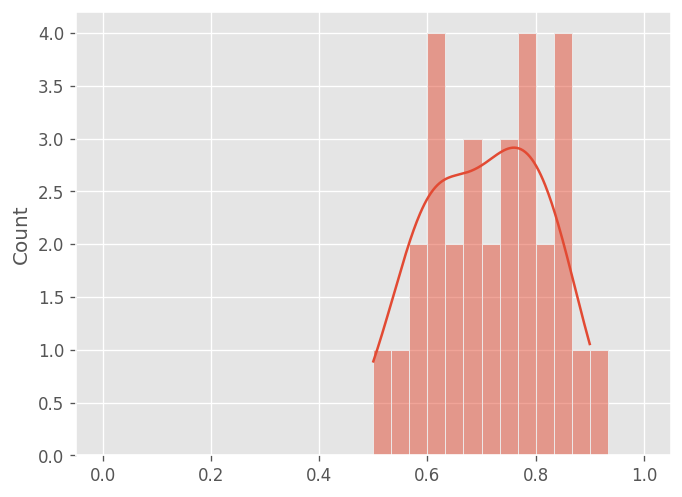

In [145]:
sns.histplot(lotsofsamples, kde=True, binrange=(0,1),binwidth=1/30)

Here, we actually know the (study) population mean, so we can compare our sample mean to this.

In [146]:
studypop.mean()

0.6965589155370178

## Validity and reliability

**Validity**: The degree to which an instrument measures the construct that it is supposed to measure

**Reliability**: The degree to which an instrument produces consistent results

> "Validity is concerned with getting the right assessment and reliability is concerned with getting the assessment right" (Reece and Walker, 2000)

![Validity and reliability](images/reliabilityandvalidity.png)

## Framing the questions

* 92% of Ryanair passengers are satisfied with their flight experience:
    Choose from "excellent, very good, good, fair, OK"
* 52% support the idea of giving 16- and 17- year olds the right to vote
* 56% oppose reducing the voting age from 18 to 16
(Spiegelhalter, 2019)

qv Yes Minister (1986): "[Leading Questions](https://www.youtube.com/watch?v=G0ZZJXw4MTA)"

## Creating an online questionnaire

* The only way is ethics
  * DPA compliance
  * Informed consent
  * Right to withdraw
  * Required questions?
  * Anonymity
  * Confidentiality
* Think ahead
  * How will you analyse the data?
  * Consistency
    * Likert scales
  * What if you change your mind? Pilot the questionnaire
  * Triangulation
* Respect your participants
  * Balance your desire for reliability and triangulation with their time and effort
  * Sharing your findings
  * Language and accessibility
  * Devices and browsers

Theres lots more in the methods books, e.g. chapters 17, 18 and 24 of [Cohen et al (2018)](https://roehamptonuniversity.on.worldcat.org/oclc/962234395)

## Stevens's Scales of Measurement

- nominal  
- ordinal  
- interval  
- ratio

[Stevens (1946)](https://psychology.okstate.edu/faculty/jgrice/psyc3214/Stevens_FourScales_1946.pdf)

## Likert scales

e.g.
* Strongly disagree, disagree, neutral, agree, strongly agree
* Never, rarely, sometimes, often, always
* Not at all, very little, a little, quite a lot, a very great deal
* None, basic, competent, proficient, expert (after [Dreyfus and Dreyfus, 1980](https://apps.dtic.mil/sti/pdfs/ADA084551.pdf))

Note:
* Very common, with lots of methods literature to draw on. 
* Which of Stenvens's scales is a Likert scale?
* When coding, it's helpful to have positivity given high values, but be consistent with the direction across all items
* Do you think it's better to have an odd or even number of options?
* Can you take a mean of a Likert scale scores?
* What other issues do you see with these? 

pp 480-485 of [Cohen et al (2018)](https://roehamptonuniversity.on.worldcat.org/oclc/962234395) is very good on these.




## Examples

What's wrong with [this questionnaire](https://docs.google.com/forms/d/e/1FAIpQLSfWhQ6JkMgOlvL_p0GsGcHhKIrnoCt-Dg1wPDVje3V4IZzabg/viewform?usp=sf_link)?

[Here's the one](https://docs.google.com/forms/d/e/1FAIpQLSfgILZUbgAy76Y6xNxJo6qKb11yks45JM1cxtlOEHL_pQzyfw/formResponse) we'll look at the data from later. What do you think?

Pick a topic you're interested in and design a questionnaire to collect data on it. What are the key questions you'd want to ask? What are the key issues you'd need to consider in designing the questionnaire? Who would be in your sample?

## Ethical principles

a. Social science is fundamental to a democratic society, and
should be inclusive of different interests, values, funders,
methods and perspectives.  
b. All social science should respect the privacy, autonomy,
diversity, values and dignity of individuals, groups
and communities.  
c. All social science should be conducted with integrity
throughout, employing the most appropriate methods
for the research purpose.  
d. All social scientists should act with regard to their
social responsibilities in conducting and disseminating
their research.  
e. All social science should aim to maximise benefit and
minimise harm.  

([Academy of Social Sciences, 2015](https://www.acss.org.uk/wp-content/uploads/2016/06/5-Ethics-Principles-for-Social-Science-Research-Flyer.pdf))

## Guidelines

* Participants: 
  * consent  
  * transparency  
  * right to withdraw  
  * incentives  
  * harm  
  * privacy  
  * data storage  
  * disclosure
Stakeholders
* Other researchers: "researchers should endeavour to make their data and methods amenable to reasonable external scrutiny. Ideally, researchers will make shareable anonymised versions of data available for secondary analysis."
* Publication and dissemination
* Wellbeing and development

[BERA, 2018](https://www.bera.ac.uk/publication/ethical-guidelines-for-educational-research-2018-online)


## Data Protection Act 2018

Personal data means any information relating to an identified or identifiable living individual

* processing shall be lawful and fair  
* purposes of processing shall be specified, explicit and legitimate  
* personal data shall be adequate, relevant and not excessive  
* personal data shall be accurate and kept up to date  
* personal data shall be kept for no longer than is necessary  
* personal data shall be processed in a secure manner  

Note additional safeguards for "sensitive personal data"

[Data Protection Act 2018](https://www.legislation.gov.uk/ukpga/2018/12/contents/enacted)

# Analysis

## The hypothesis

* A statement or prediction about the relationship between two or more variables
* A hypothesis is a testable statement
* Based on experience, theory or previous research
* Usually stated as a declarative sentence, e.g. "Postgraduate students have better IT skills than undergraduates"
* Three components: variables, population and the the relationship between the variables
* It translates your research question into a prediction of expected outcomes
* Only used in quantitative research

## Types of hypotheses

* Null hypothesis (H0)
  * A statement of no effect or no difference
  * e.g. "There is no difference in IT skills between postgraduate and undergraduate students"
* Alternative hypothesis (H1)
  * A statement of an effect or difference

Typically, we assume the null hypothesis is true and then test if it explains the data we have. If it does *not*, we reject the null hypothesis and accept the alternative hypothesis. 





## Statistical significance

* A result is statistically significant if it is unlikely to have occurred by chance
* The *probability* of obtaining a result as extreme as the one observed, assuming the null hypothesis is true, is the **p-value**
* If the p-value is less than a pre-determined level, usually 0.05, we reject the null hypothesis

E.g. if there is no difference in IT skills between postgraduate and undergraduate students, the probability of observing a difference *from our sample* as large as the one we have is less than 5%

* A study is statistically significant if the p-value is less than the pre-specified $\alpha$ (significance threshold). 
* A p-value less than $\alpha$ is a statistically significant result 
* A p-value greater to or equal to $\alpha$ is not a statistically significant result.


## Normal distribution

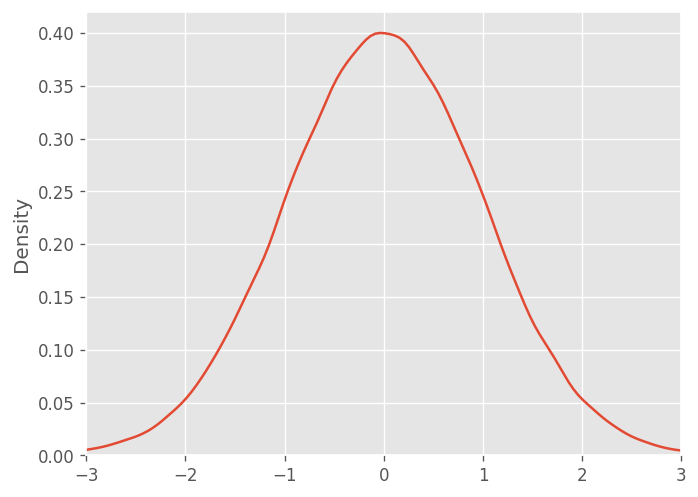

In [70]:
np.random.seed(0)

#create data
x = np.random.normal(size=100000)

#create normal distribution curve
fig, ax = plt.subplots()
sns.kdeplot(x, ax=ax)
ax.set_xlim(-3, 3)
plt.show()

## Normality 

* Many statistical tests assume that the data is normally distributed
* Sample means are normally distributed, even if the population is not, if the sample size is large enough, and if the sampling method is good enough (Central Limit Theorem)
* You can test for normality, in Pandas, we use `stats.normaltest` or `stats.shapiro` to test for normality
* If the p-value is less than 0.05, we reject the null hypothesis that the data is normally distributed, and then most of the statistical tests we use are not valid. There are alternative tests for non-normal data, but they are less powerful and less well known - you're looking for 'non-parametric' tests.
* If the p-value is greater than 0.05, we accept the null hypothesis that the data is normally distributed, and we can use the standard statistical tests.

What about one of our Likert scales - are the results for, e.g., working with audio normally distributed?

In [154]:
stats.normaltest(audit['audio'],nan_policy='omit')

NormaltestResult(statistic=39.189745887461754, pvalue=3.0906854451390115e-09)

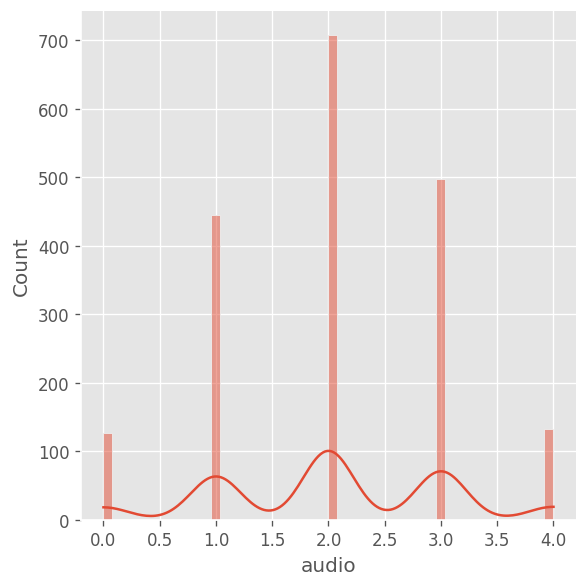

In [156]:
sns.displot(audit['audio'], kde=True, bins=50)

So we really should treat this as an ordinal scale, but even here we have issues of reliability and validity. How could I have avoided these?

In [157]:
freqs = audit['audio'].value_counts()
freqs

audio
2.0    707
3.0    497
1.0    444
4.0    132
0.0    127
Name: count, dtype: int64

<Axes: xlabel='audio'>

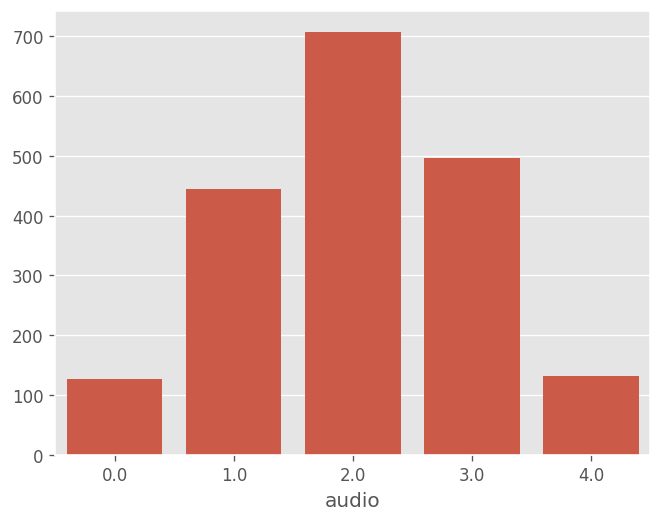

In [158]:
sns.barplot(x=freqs.index, y=freqs.values)

In [185]:
audit[['audio','UorP']].groupby('UorP').mean()


,audio
UorP,
P,1.956033
U,2.114101


In [193]:
stats.ttest_ind(audit['audio'][audit['UorP']=="U"], audit['audio'][audit['UorP']=="P"], nan_policy='omit')

TtestResult(statistic=3.3988569599739202, pvalue=0.000690620421321836, df=1905.0)

We'll now create aggregate measures of skills and knowledge. Do you think this is valid?

In [186]:
audit['skills'] = audit[['computers', 'documents', 'sharing',
                         'wordprocessing', 'presentations', 'whiteboards', 'spreadsheets',
                        'databases', 'browsers', 'email', 'social', 'photography', 'images',
                         'audio', 'video', 'monitoring', 'programming']].mean(axis=1)

audit['knowledge'] = audit[['logic', 'algorithms',
                            'decomposition', 'generalisation', 'abstraction', 'internet', 'web',
                           'search', 'privacy', 'security', 'copyright']].mean(axis=1)

audit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
computers,1908.0,1.895178,0.940561,0.0000,1.000000,2.000000,3.000000,4.000000
documents,1914.0,2.736677,0.779804,0.0000,2.000000,3.000000,3.000000,4.000000
sharing,1912.0,2.749477,0.838316,0.0000,2.000000,3.000000,3.000000,4.000000
wordprocessing,1911.0,2.724228,0.828064,0.0000,2.000000,3.000000,3.000000,4.000000
presentations,1913.0,2.575013,0.949974,0.0000,2.000000,3.000000,3.000000,4.000000
whiteboards,1912.0,1.197176,0.997817,0.0000,0.000000,1.000000,2.000000,4.000000
spreadsheets,1913.0,1.561422,0.982864,0.0000,1.000000,2.000000,2.000000,4.000000
databases,1909.0,1.353064,0.965884,0.0000,1.000000,1.000000,2.000000,4.000000
browsers,1907.0,3.004719,0.819156,0.0000,3.000000,3.000000,4.000000,4.000000
email,1911.0,3.265829,0.693635,0.0000,3.000000,3.000000,4.000000,4.000000


When you're working with this data, here's a handy list of the variables we have.

In [187]:
audit.columns


Index(['Timestamp', 'UorP', 'computers', 'documents', 'sharing',
       'wordprocessing', 'presentations', 'whiteboards', 'spreadsheets',
       'databases', 'browsers', 'email', 'social', 'photography', 'images',
       'audio', 'video', 'monitoring', 'programming', 'logic', 'algorithms',
       'decomposition', 'generalisation', 'abstraction', 'internet', 'web',
       'search', 'privacy', 'security', 'copyright', 'devices', 'style',
       'quals', 'employment', 'training', 'comments', 'oldknowledge',
       'oldunderstanding', 'windowsdesktop', 'appledesktop', 'otherdesktop',
       'windowslaptop', 'applelaptop', 'otherlaptop', 'iphone', 'androidphone',
       'blackberry', 'windowsphone', 'ipad', 'othertablet', 'ereader',
       'console', 'pi', 'cohort', 'skills', 'knowledge'],
      dtype='object')

Here's a summary of students' skills, showing proportions in each Likert scale category. What do you notice?

In [188]:
skills = audit[['computers', 'documents', 'sharing',
                'wordprocessing', 'presentations', 'whiteboards', 'spreadsheets',
               'databases', 'browsers', 'email', 'social', 'photography', 'images',
                'audio', 'video', 'monitoring', 'programming']].apply(pd.Series.value_counts, normalize=True)  # type: ignore
skills = skills.transpose()
skills['average'] = (skills[1.0]+2*skills[2.0]+3*skills[3.0]+4*skills[4.0])
skills = skills.sort_values(by='average')

skills


,0.0,1.0,2.0,3.0,4.0,average
programming,0.655858,0.243201,0.077406,0.019874,0.003661,0.472280
monitoring,0.527996,0.294610,0.136578,0.034537,0.006279,0.696494
whiteboards,0.289749,0.341527,0.260983,0.097280,0.010460,1.197176
databases,0.194343,0.399686,0.280775,0.108958,0.016239,1.353064
spreadsheets,0.141662,0.351803,0.331417,0.153685,0.021432,1.561422
video,0.158390,0.348667,0.296916,0.153685,0.042342,1.572922
computers,0.065514,0.272537,0.394130,0.236897,0.030922,1.895178
audio,0.066597,0.232826,0.370739,0.260619,0.069219,2.033036
presentations,0.024046,0.106639,0.289597,0.429692,0.150026,2.575013
images,0.024607,0.117801,0.276963,0.409424,0.171204,2.584817


Are their issues (of statistical validity) with the above data?

Once we've calculated this summary table, it's surprisingly easy to get a visualisation.

<Axes: >

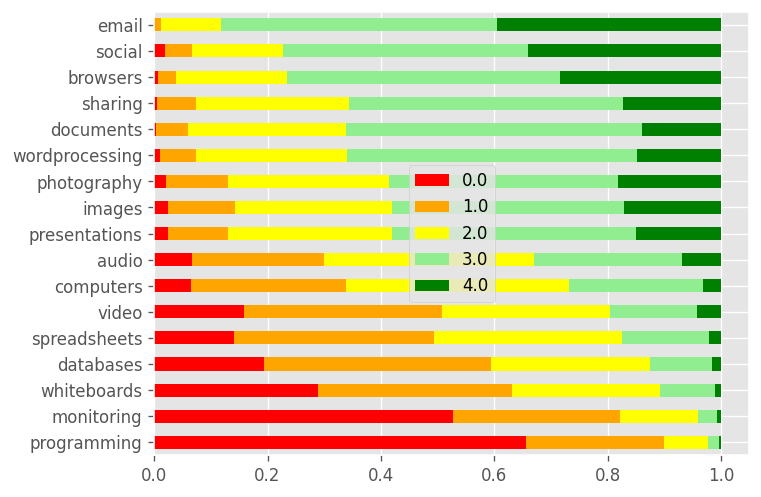

In [39]:
skills.drop(['average'], axis=1).plot.barh(stacked=True, color=[
    "red", "orange", "yellow", "lightgreen", "green"])


And here's the same approach for the knowledge questions:

In [40]:
knowledge = audit[['logic', 'algorithms',
                   'decomposition', 'generalisation', 'abstraction', 'internet', 'web',
                  'search', 'privacy', 'security', 'copyright']].apply(pd.Series.value_counts, normalize=True)  # type: ignore
knowledge = knowledge.transpose()
knowledge['average'] = (knowledge[1.0]+2*knowledge[2.0] +
                        3*knowledge[3.0]+4*knowledge[4.0])
knowledge = knowledge.sort_values(by='average')

knowledge


,0.0,1.0,2.0,3.0,4.0,average
abstraction,0.599799,0.262788,0.113340,0.022066,0.002006,0.563691
decomposition,0.524623,0.312563,0.124623,0.033166,0.005025,0.681407
algorithms,0.473948,0.320641,0.139279,0.060120,0.006012,0.803607
logic,0.470411,0.289870,0.177533,0.057172,0.005015,0.836510
web,0.400602,0.401606,0.144578,0.048193,0.005020,0.855422
generalisation,0.408818,0.358717,0.178357,0.049098,0.005010,0.882766
copyright,0.384384,0.376376,0.161161,0.066066,0.012012,0.944945
search,0.397192,0.353059,0.164493,0.077232,0.008024,0.945838
internet,0.340383,0.404834,0.176234,0.066465,0.012085,1.005035
privacy,0.264529,0.399800,0.226453,0.095190,0.014028,1.194389


<Axes: >

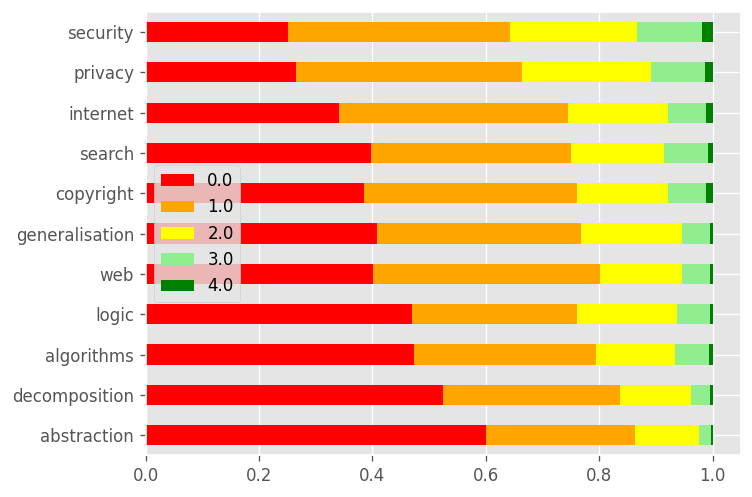

In [41]:
knowledge.drop(['average'], axis=1).plot.barh(stacked=True, color=[
    "red", "orange", "yellow", "lightgreen", "green"])


Let's create aggregate measures of skills and knowledge.

In [42]:
audit['skills'] = audit[['computers', 'documents', 'sharing',
                         'wordprocessing', 'presentations', 'whiteboards', 'spreadsheets',
                        'databases', 'browsers', 'email', 'social', 'photography', 'images',
                         'audio', 'video', 'monitoring', 'programming']].mean(axis=1)

audit['knowledge'] = audit[['logic', 'algorithms',
                            'decomposition', 'generalisation', 'abstraction', 'internet', 'web',
                           'search', 'privacy', 'security', 'copyright']].mean(axis=1)

audit[['skills','knowledge']].describe()

,skills,knowledge
count,1916.000000,1001.000000
mean,2.121361,0.906434
std,0.585280,0.709128
min,0.062500,0.000000
25%,1.761029,0.363636
50%,2.117647,0.727273
75%,2.529412,1.272727
max,3.764706,3.545455


Comparing the aggregate measures for both skills and knowledge:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

<Axes: >

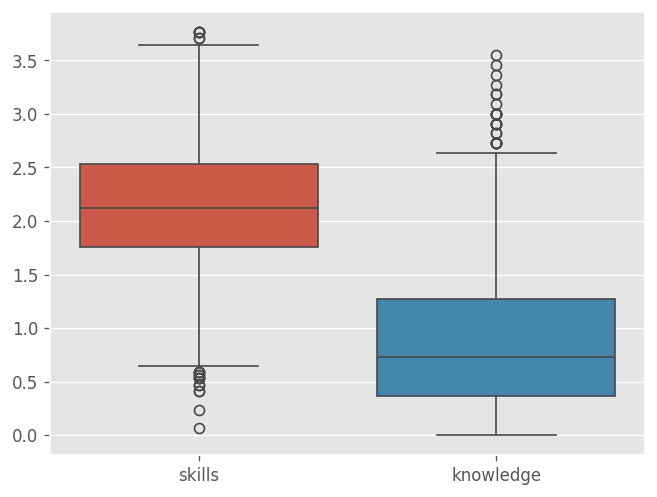

In [43]:
sns.boxplot(data=audit[["skills", "knowledge"]])


There's obviously a *significant* difference here, but we can do a paired sample t-test to check:

In [44]:
stats.ttest_rel(audit['skills'], audit['knowledge'],
                nan_policy='omit')


TtestResult(statistic=60.322679232466406, pvalue=0.0, df=1000)

Although there is some connection ('correlation') between these measures:

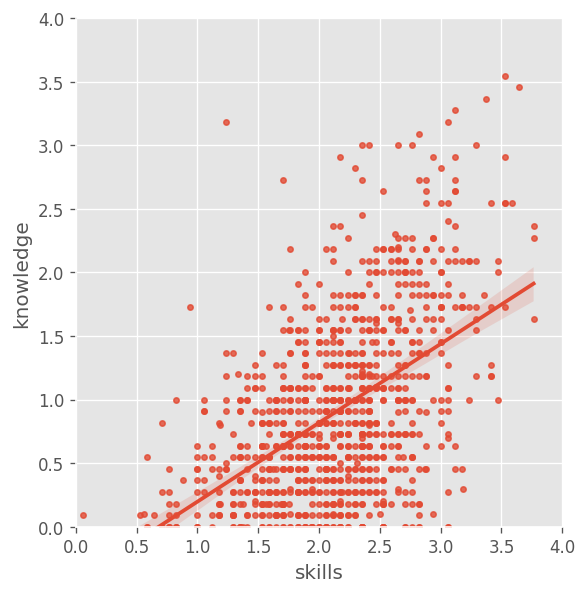

In [45]:

g = sns.lmplot(data=audit, x='skills', y='knowledge', scatter_kws={"s": 10})
g.set(ylim=(0, 4), xlim=(0, 4))
g


We can make comparisons according to whether a student has a particular device or not, e.g. an iPhone:

In [51]:
audit[['skills','knowledge','iphone']].groupby('iphone').mean()


,skills,knowledge
iphone,,
False,2.055387,0.872745
True,2.148196,0.916146


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='iphone', ylabel='skills'>

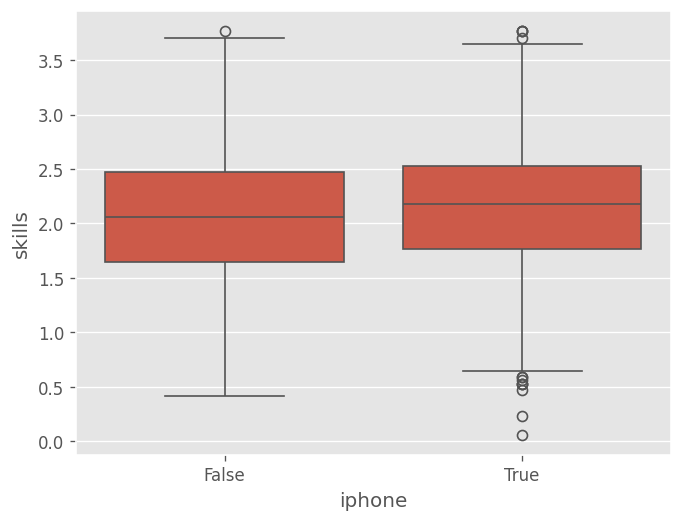

In [49]:
sns.boxplot(data=audit, x="UorP", y="skills")


In [ ]:
stats.ttest_ind(audit[audit['iphone'] == True]['skills'],
                audit[audit['iphone'] == False]['skills'],
                nan_policy='omit')


Ttest_indResult(statistic=3.1541425313075053, pvalue=0.0016346945539427724)

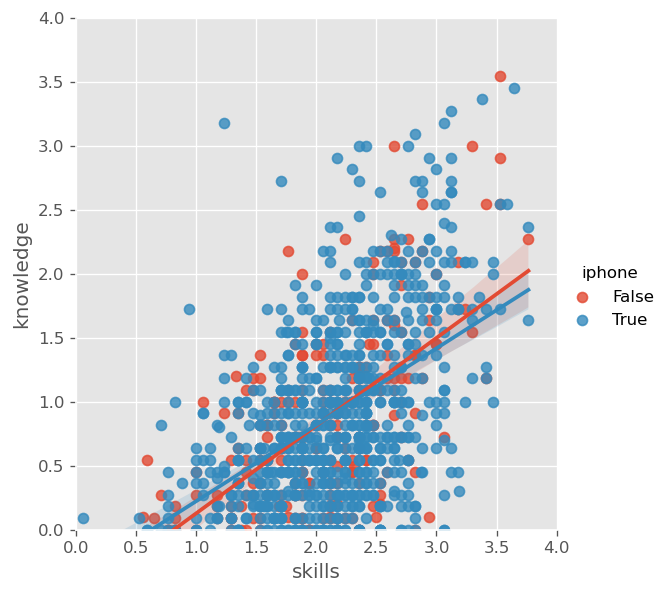

In [ ]:
g = sns.lmplot(data=audit, x='skills', y='knowledge', hue='iphone')
g.set(ylim=(0, 4), xlim=(0, 4))
g


We can do a similar analysis according to their technology 'learning style':

In [53]:
audit[['skills', 'knowledge','style']].groupby('style').mean()


,skills,knowledge
style,,
experiment,2.307072,1.048905
instructions,2.136957,0.912609
support,1.888490,0.747073


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='style', ylabel='knowledge'>

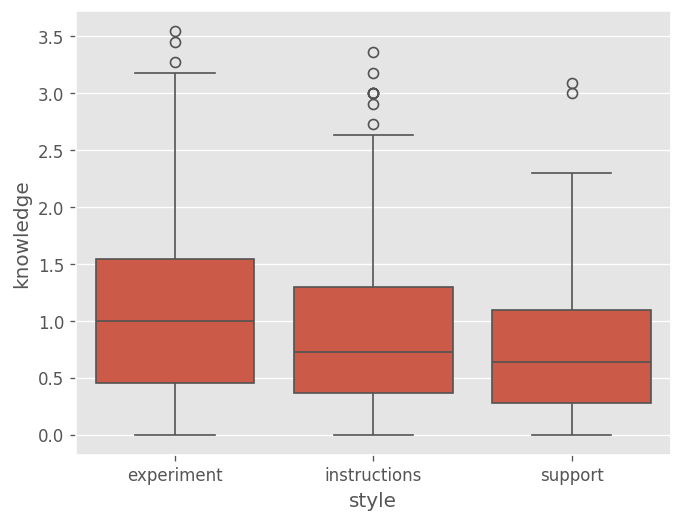

In [54]:
sns.boxplot(data=audit, x="style", y="knowledge")


In [55]:
stats.f_oneway(audit[audit['style'] == 'experiment']['skills'].notna(),
               audit[audit['style'] == 'instructions']['skills'].notna(),
               audit[audit['style'] == 'support']['skills'].notna())


F_onewayResult(statistic=0.7711481065822426, pvalue=0.4626261748378503)

Finally, we can look at how things have changed from one cohort to the next. Note here we can use a line plot.

<Axes: xlabel='cohort'>

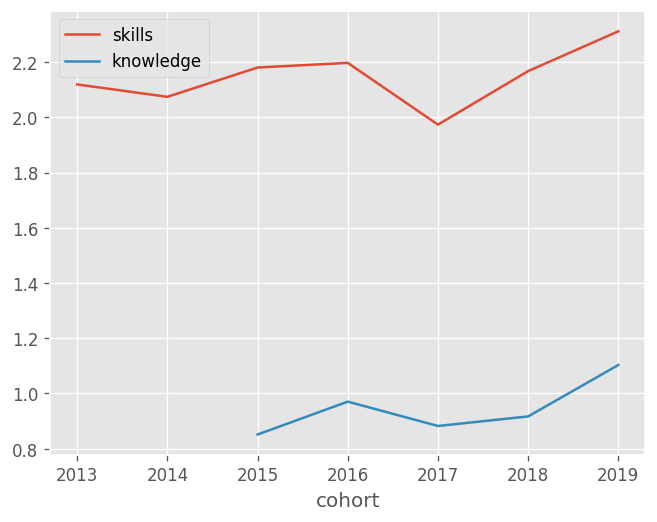

In [56]:
audit[['cohort','skills', 'knowledge']].groupby('cohort').mean().plot.line()
